## <font color = "cyan"> Séries Temporelles - Températures</font>
***
Prédictions sur l'année 2021 + 6 premiers mois 2022

Données récupérées sur les températures maximales autour de Melbourne entre 1919 et 2021. 
Moyennes par mois par année; 
Trois stations proches de Melbourne combinées.

__Résultats sur les données 1995-2021 (dataset le plus complet des trois).__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
debut = pd.read_csv("mean_max_Temp_1919-1975.csv")
milieu = pd.read_csv("mean_max_Temp - 1953-2006.csv")
fin = pd.read_csv("mean_max_Temp_1995-2021.csv")

debut.head()

,Product code,Station Number,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
0,IDCJAC0002,86079,1919,24.0,27.1,20.2,20.7,16.9,13.5,12.1,14.1,16.3,18.8,21.6,24.5,19.2
1,IDCJAC0002,86079,1920,22.7,26.1,21.9,18.2,14.3,13.1,13.0,13.2,15.7,18.4,19.8,23.2,18.3
2,IDCJAC0002,86079,1921,25.4,26.2,22.9,19.6,16.8,13.7,13.1,13.2,16.8,17.4,21.2,21.1,18.9
3,IDCJAC0002,86079,1922,23.9,25.6,26.1,19.3,15.8,13.1,13.4,13.1,15.1,17.6,20.3,22.3,18.8
4,IDCJAC0002,86079,1923,22.8,23.7,21.7,21.7,16.4,13.2,12.2,13.6,14.7,17.1,18.9,22.0,18.2


In [121]:
debut.drop(['Product code', 'Station Number', 'Annual'], axis = 1, inplace = True)
milieu.drop(['Product code', 'Station Number', 'Annual'], axis = 1, inplace = True)
fin.drop(['Product code', 'Station Number', 'Annual'], axis = 1, inplace = True)

<font color = "purple">__Transformation des df pour correspondre au format series et pour faciliter le remplacement des NaN__</font>

In [122]:
# pour les trois df: montrer les lignes des df comprenant des NaN
slice_object = slice(2, 14)
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

debut_final = pd.DataFrame(columns = ['Date', 'Mean_Max_Temp'])

debut_final
for row in debut.itertuples():
    for temp, month in zip(row[slice_object], months):
        date = str(row.Year) + '-' + str(month)
        debut_final = debut_final.append({'Date' : date , 'Mean_Max_Temp' : temp} , ignore_index=True)

In [123]:
def transform_df(df):
    slice_object = slice(2, 14)
    months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

    new_df = pd.DataFrame(columns = ['Date', 'Mean_Max_Temp'])

    for row in df.itertuples():
        for temp, month in zip(row[slice_object], months):
            date = str(row.Year) + '-' + str(month)
            new_df = new_df.append({'Date' : date , 'Mean_Max_Temp' : temp} , ignore_index=True)
            
    return new_df

In [124]:
series_debut = transform_df(debut)
series_milieu = transform_df(milieu)
series_fin = transform_df(fin)


In [125]:
print(series_debut.head())
print(series_milieu.head())
print(series_fin.head())

      Date  Mean_Max_Temp
0  1919-01           24.0
1  1919-02           27.1
2  1919-03           20.2
3  1919-04           20.7
4  1919-05           16.9
      Date  Mean_Max_Temp
0  1953-01           21.3
1  1953-02           21.1
2  1953-03           20.9
3  1953-04           16.4
4  1953-05           11.7
      Date  Mean_Max_Temp
0  1995-01            NaN
1  1995-02            NaN
2  1995-03            NaN
3  1995-04           17.4
4  1995-05           14.9


<font color ="purple">__Boûcles de remplacement des NaN: les trois df ont des dates qui se chevauchent, les dates NaN sont remplacées par les valeurs des mêmes dates des autres df__</font>

In [126]:
# DEBUT: Si certaines dates se chevauchent dans les trois df et que l'un d'elles est NaN et pas les autres, remplacer les NaN par les autres
for row in series_debut.itertuples():
    if pd.isna(row.Mean_Max_Temp):
        other = series_milieu[series_milieu['Date'] == row.Date]['Mean_Max_Temp'].values
        if len(other) > 0:
            series_debut.at[row.Index, 'Mean_Max_Temp'] = other[0]
            # series_debut.loc[row.Index]['Mean_Max_Temp'] = other[0]
   

In [127]:
# IDEM POUR MILIEU
for row in series_milieu.itertuples():
    if pd.isna(row.Mean_Max_Temp):
        
        other_debut = series_debut[series_debut['Date'] == row.Date]['Mean_Max_Temp'].values
        other_fin = series_fin[series_fin['Date'] == row.Date]['Mean_Max_Temp'].values
        
        if len(other_debut) > 0:
            series_milieu.at[row.Index, 'Mean_Max_Temp'] = other_debut[0]

        if len(other_fin) > 0:
            series_milieu.at[row.Index, 'Mean_Max_Temp'] = other_fin[0]

In [128]:
# FIN
for row in series_fin.itertuples():
    if pd.isna(row.Mean_Max_Temp):
        other = series_milieu[series_milieu['Date'] == row.Date]['Mean_Max_Temp'].values
        if len(other) > 0:
            series_fin.at[row.Index, 'Mean_Max_Temp'] = other[0]

In [129]:
series_debut[pd.isna(series_debut['Mean_Max_Temp'])]

,Date,Mean_Max_Temp
66,1924-07,NaN
67,1924-08,NaN
68,1924-09,NaN
69,1924-10,NaN
70,1924-11,NaN
71,1924-12,NaN
72,1925-01,NaN
73,1925-02,NaN
74,1925-03,NaN
75,1925-04,NaN


### __********************************************************__


### <font color = "cyan">__Application d'un modèle sur les données complétées entre 1995 et 2021__

#### <font color = "purple">__Préparation des données & Visualisation__</font>

In [130]:
series_fin.dropna(inplace = True)

In [131]:
series_fin.set_index('Date', inplace = True)

In [132]:
series_fin = series_fin.squeeze()

series_fin

Date
1995-01    23.4
1995-02    23.0
1995-03    18.0
1995-04    17.4
1995-05    14.9
           ... 
2021-06    15.5
2021-07    14.9
2021-08    16.6
2021-09    18.3
2021-10    19.1
Name: Mean_Max_Temp, Length: 322, dtype: float64

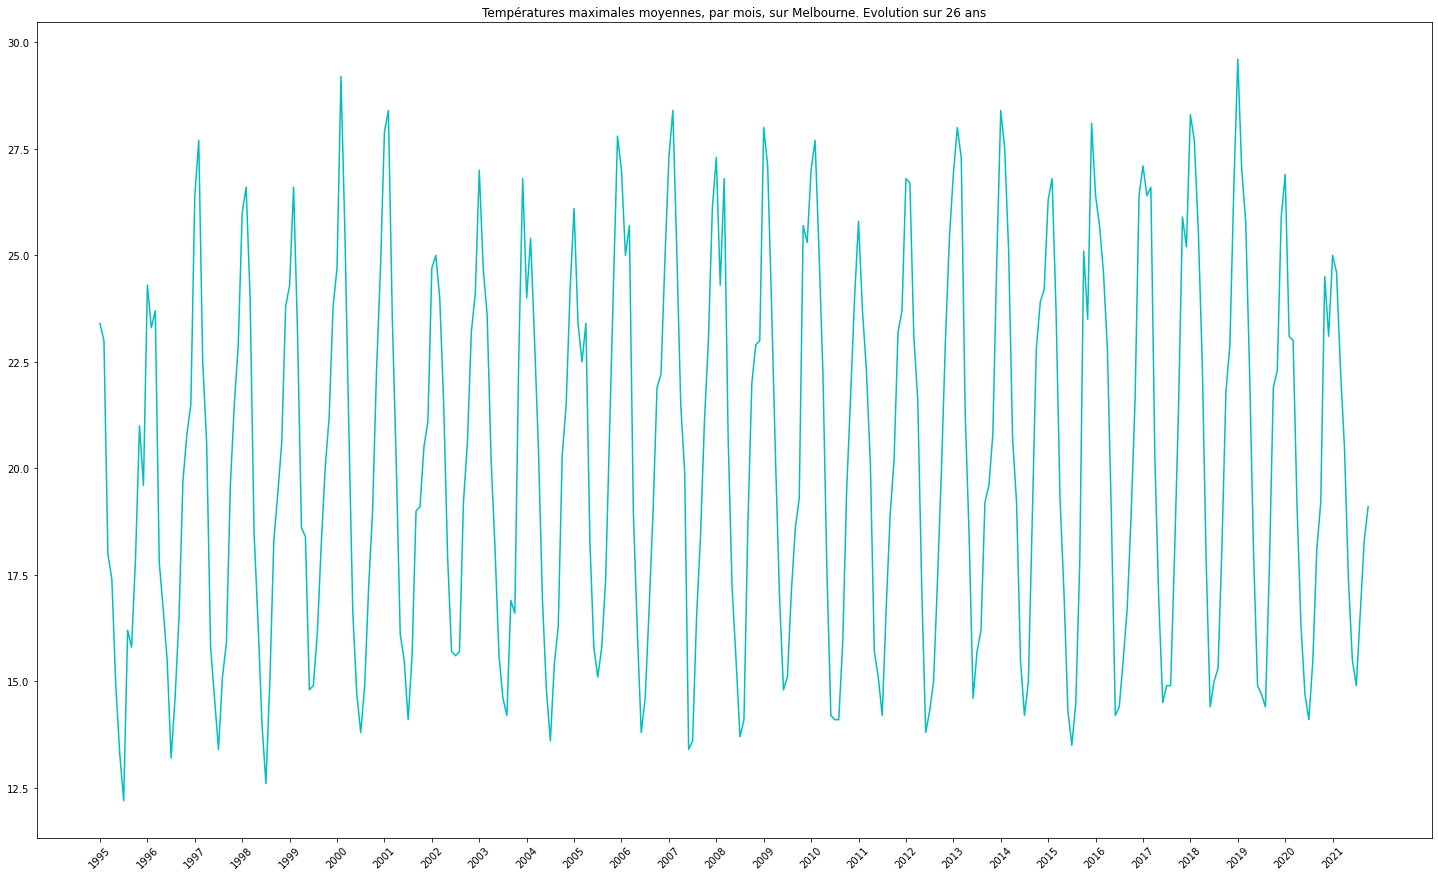

In [133]:
plt.figure(figsize = (25, 15))

plt.plot(series_fin, color = 'c')

# Réarrangement des labels de xticks
ticks = np.arange(0, len(series_fin), 12)
series_fin.index

x_labels = []

for x in ticks:
    x_labels.append(series_fin.index[x].split("-")[0])

plt.xticks(ticks, x_labels, rotation=45)

# Title
plt.title('Températures maximales moyennes, par mois, sur Melbourne. Evolution sur 26 ans');

Comme on s'y attendait logiquement, il semble bien y avoir un phénomène cyclique des températures maximales sur une année, avec un pic (valeurs moyennes mensuelles) en début d'année (été) et une chute en milieu d'année (hiver). Cela se reproduit bien tous les ans. 

#### <font color = "purple">__Décomposition Saisonnière & Différenciations__</font>

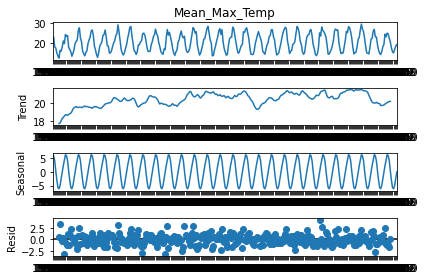

In [134]:
from statsmodels.tsa.seasonal import seasonal_decompose

res = seasonal_decompose(series_fin, period = 12, model = 'a') # forcé avec period = 1, 12???
res.plot()
plt.show()

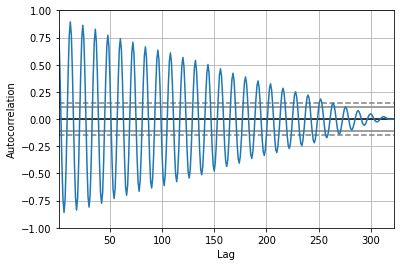

In [135]:
pd.plotting.autocorrelation_plot(series_fin);

1.7846996571100285e-13

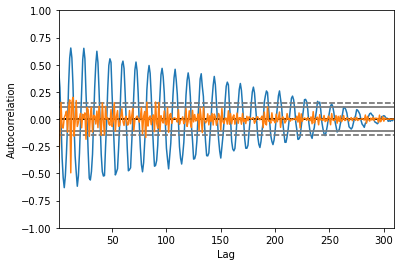

In [136]:
#Différenciation? Eliminer les pics de saisonnalité

series_fin1 = series_fin.diff().dropna()
pd.plotting.autocorrelation_plot(series_fin1);

series_fin2 = series_fin1.diff(periods = 12).dropna()
pd.plotting.autocorrelation_plot(series_fin2);

# Test stat:
from statsmodels.tsa.stattools import adfuller
#adfuller(series_fin2)

_, p_value, _, _, _, _  = adfuller(series_fin2)
p_value

#### <font color = "purple">__Application d'un modèle SARIMAX__</font>

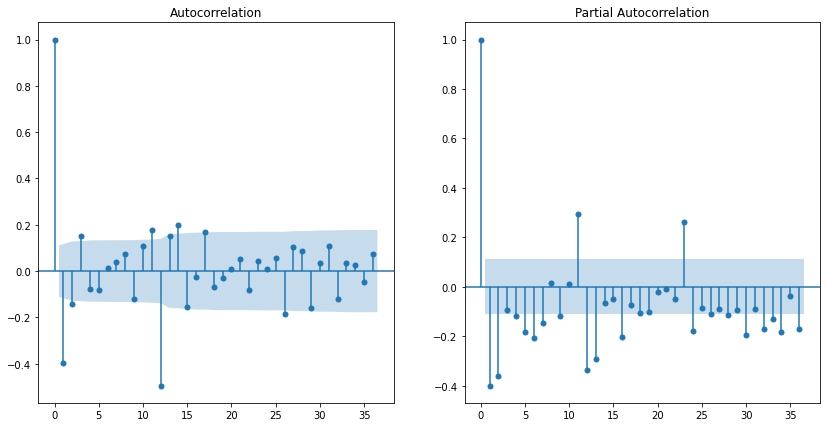

In [137]:
# À l'aide des fonction ACF et PACF, estimation des autres paramètres probables du modele SARIMA

from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

plt.figure(figsize= (14,7))

plt.subplot(121)
plot_acf(series_fin2, lags = 36, ax=plt.gca())

plt.subplot(122)
plot_pacf(series_fin2, lags = 36, ax=plt.gca())

plt.show()

In [138]:
import statsmodels.api as sm

model= sm.tsa.SARIMAX(series_fin, order=(1,1,1),seasonal_order=(0,1,1,12))
sarima=model.fit()

print(sarima.summary())

print("Tous les paramètres semblent être significatifs pour le modèle.")
print("Le test de Ljung-Box montre une p-valeur de 0.61 , donc on ne rejette pas l'hypothèse selon laquelle le résidu est un bruit blanc, qui semble suivre une distribution normale selon le résultat du test Jarque-Bera")


/Users/lise/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/lise/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                      Mean_Max_Temp   No. Observations:                  322
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -530.725
Date:                            Sun, 05 Dec 2021   AIC                           1069.449
Time:                                    00:37:23   BIC                           1084.382
Sample:                                01-01-1995   HQIC                          1075.419
                                     - 10-01-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2255      0.063      3.595      0.000       0.103       0.348
ma.L1         -0.9302      0.027   

#### <font color = "purple">__Prédiction & Visualisation__</font>

In [139]:
import datetime

pred = sarima.predict(312, 321) #Prédiction sur la dernière année = 2021 (Janvier - Octobre)

In [140]:
series = series_fin.to_frame()

In [141]:
# Changer les index de pred sinon pb avec TimeStamp, format différent de la série de valeurs réelles. 
new_index = []

for i in pred.index:
    new_index.append(i.strftime("%Y-%m"))

print(new_index)

pred.index = new_index

['2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10']


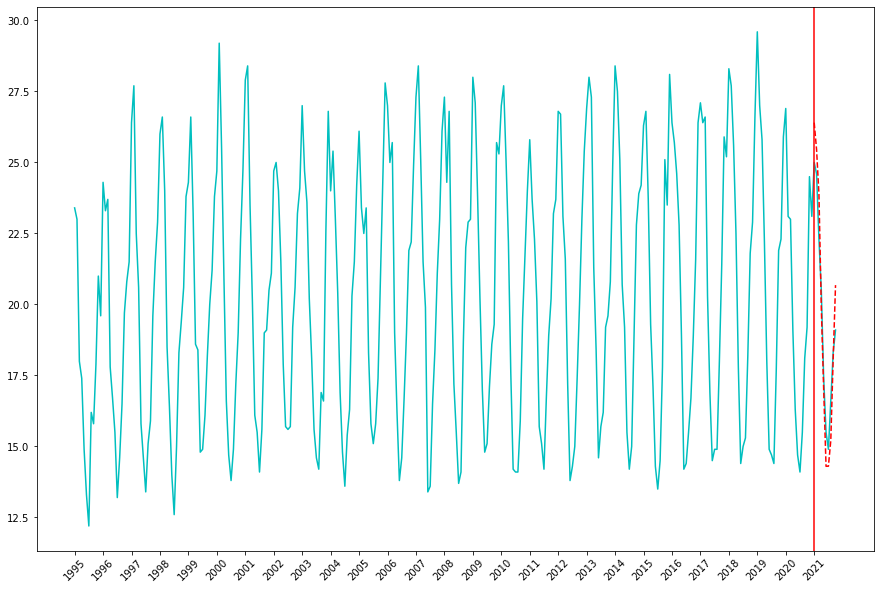

In [157]:
# On assemble les deux 

#series_pred = pd.concat([series_fin[:-10], pred])#Concaténation des prédictions

plt.figure(figsize = (15, 10))

plt.plot(series_fin, color = 'c') #Visualisation
plt.plot(pred, '--r')

plt.axvline(x= pred.index[0], color='r'); # Ajout de la ligne verticale

plt.xticks(ticks, x_labels, rotation=45);

In [168]:
final = series_fin[-10:].to_frame('Reel').join(pred.to_frame('Prédit'))

final

,Reel,Prédit
Date,,
2021-01,25.0,26.401866
2021-02,24.6,25.454987
2021-03,22.3,23.882536
2021-04,20.5,19.893049
2021-05,17.4,17.012184
2021-06,15.5,14.301666
2021-07,14.9,14.306148
2021-08,16.6,15.212271
2021-09,18.3,18.073075


Prédictions fin 2021 / Début 2022 Melbourne:

In [176]:
pred_futur = sarima.predict(321, 329)
pred_futur

fut_index = []

for i in pred_futur.index:
    fut_index.append(i.strftime("%Y-%m"))

print(fut_index)

pred_futur.index = fut_index

['2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06']


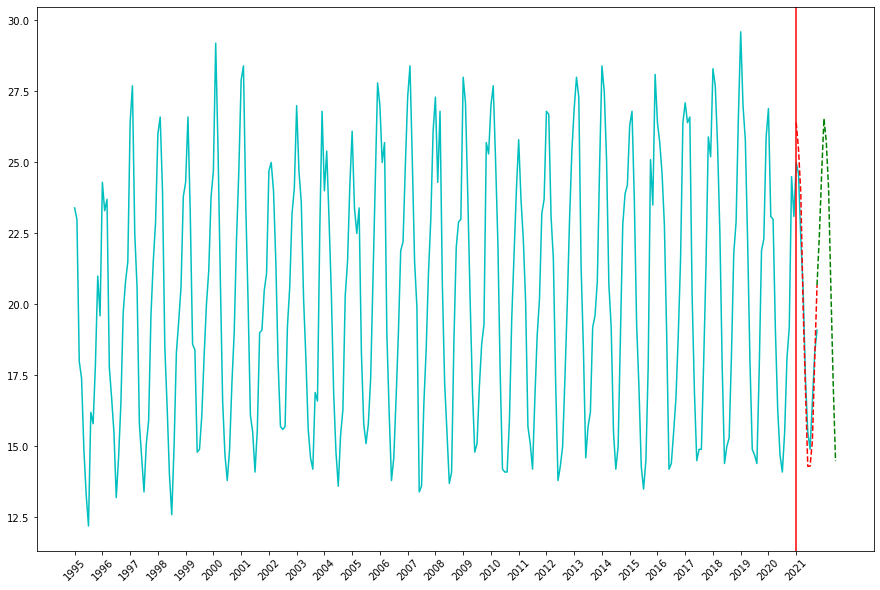

In [177]:
plt.figure(figsize = (15, 10))

plt.plot(series_fin, color = 'c') #Visualisation
plt.plot(pred, '--r')
plt.plot(pred_futur, '--g')

plt.axvline(x= pred.index[0], color='r'); # Ajout de la ligne verticale

plt.xticks(ticks, x_labels, rotation=45);

In [178]:
pred_futur

2021-10    20.680542
2021-11    22.411703
2021-12    24.622137
2022-01    26.544505
2022-02    25.744196
2022-03    24.064898
2022-04    20.527463
2022-05    17.195323
2022-06    14.486582
Name: predicted_mean, dtype: float64